In [8]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim
import torch.utils.data
import torchvision
import matplotlib.pyplot as plt
import torch.distributions as dist
import abc
import torchvision.transforms as tr

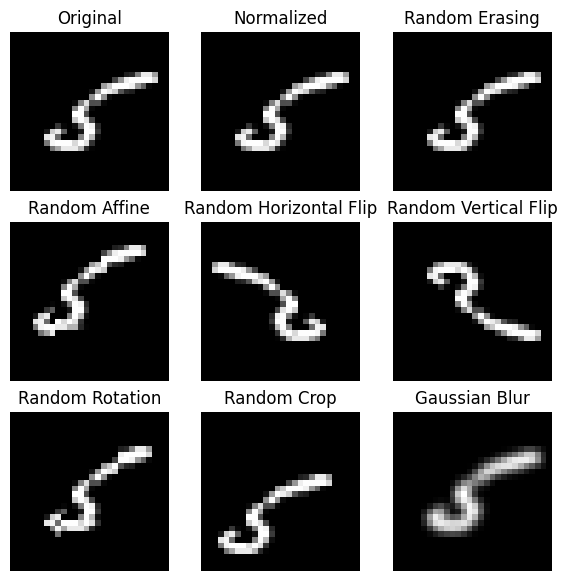

In [36]:
# Load MNIST dataset
t1 = tr.Compose([tr.ToTensor()])
t2 = tr.Compose([tr.ToTensor(), tr.Normalize((0.1307,), (0.3081,))])
t3 = tr.Compose([tr.ToTensor(), tr.RandomErasing()])
t4 = tr.Compose([tr.ToTensor(), tr.RandomAffine(10, translate=(0.1, 0.1), scale=(0.9, 1.1))])
t5 = tr.Compose([tr.ToTensor(), tr.RandomHorizontalFlip(p=1)])
t6 = tr.Compose([tr.ToTensor(), tr.RandomVerticalFlip(p=1)])
t7 = tr.Compose([tr.ToTensor(), tr.RandomRotation(45)])
t8 = tr.Compose([tr.ToTensor(), tr.RandomCrop(28, padding=4)])
t9 = tr.Compose([tr.ToTensor(), tr.GaussianBlur(3, sigma=(0.1, 2.0))])

transforms = [t1, t2, t3, t4, t5, t6, t7, t8, t9]
names = ['Original', 'Normalized', 'Random Erasing', 'Random Affine', 'Random Horizontal Flip', 'Random Vertical Flip', 'Random Rotation', 'Random Crop', 'Gaussian Blur']


# plot first image of each transformation
_, axs = plt.subplots(3, 3, figsize = (7, 7))

for i in range(9):
    transform = transforms[i]
    trainset = torchvision.datasets.MNIST(root='./data', train=True, download=False, transform=transform)
    testset = torchvision.datasets.MNIST(root='./data', train=False, download=False, transform=transform)

    image_index = 11

    feature = trainset[image_index][0]
    label = trainset[image_index][1]

    axs[i//3, i%3].imshow(feature.squeeze(), cmap='gray')
    axs[i//3, i%3].set_title(names[i])
    axs[i//3, i%3].axis('off')


5


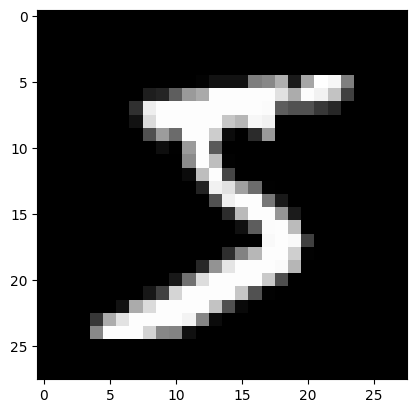

In [6]:
feature = trainset[0][0]
label = trainset[0][1]
print(label)
plt.imshow(feature.squeeze(), cmap='gray')
plt.show()